#### Part IV. Prediction with Linear Regression

In Part IV, you will an experiment with linear regression.

0. Download the provided auto.csv file. This dataset will be used to predict the target feature, mpg. 

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

1. Data Exploration

1. (a) Load the given dataset. 

In [196]:
data = pd.read_csv("Auto.csv")

1. (b) Display the initial rows of the dataset and the basic information of features. 

In [197]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [199]:
data.describe()

,mpg,cylinders,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


1. (c) Convert the horsepower feature to numeric, if it is not in numeric type within your program. 

In [200]:

data["horsepower"].replace("?", 0, inplace=True)

data.dropna(subset=["horsepower"], inplace=True)

data["horsepower"] = data["horsepower"].astype(float)
type(data["horsepower"].values[0])

numpy.float64

1. (d) Eliminate any features that are non-numeric. 

In [201]:

data = data.select_dtypes(include=['float64', 'int64'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 24.9 KB


1. (e) Utilize plots to visualize the pairwise relationships of each descriptive feature with the target
feature, mpg.

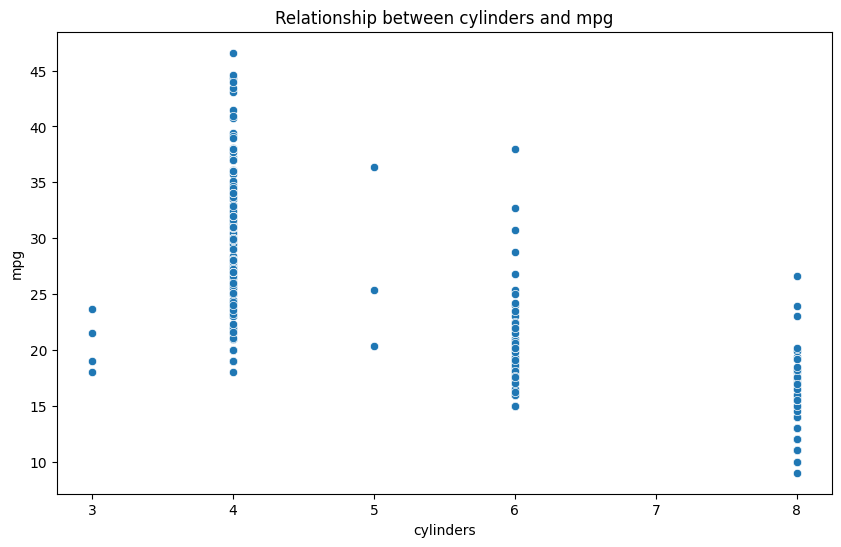

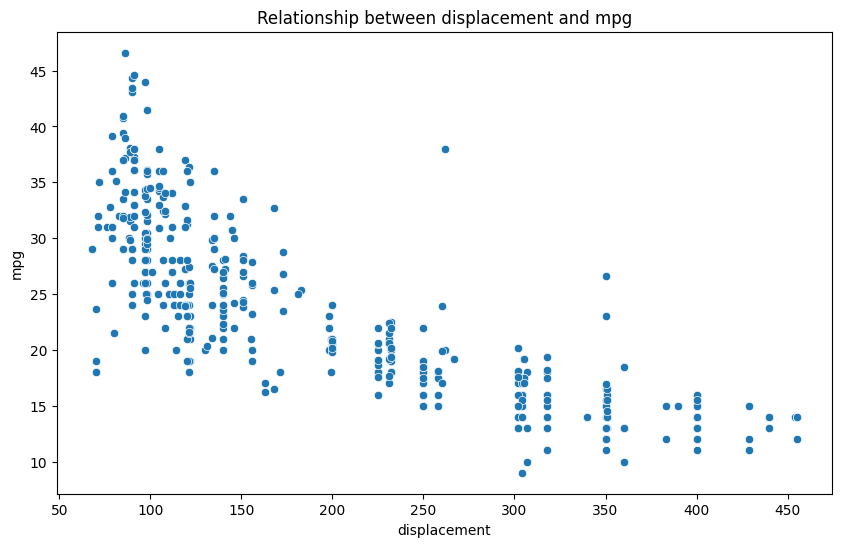

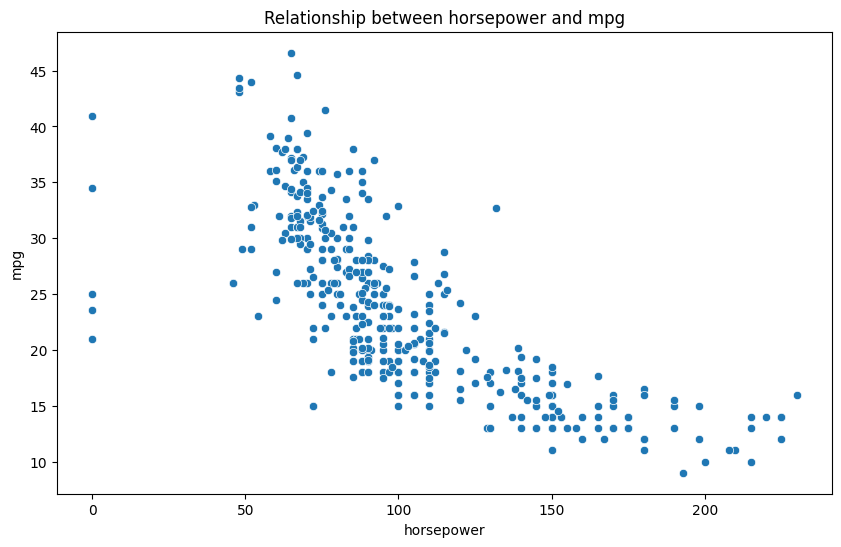

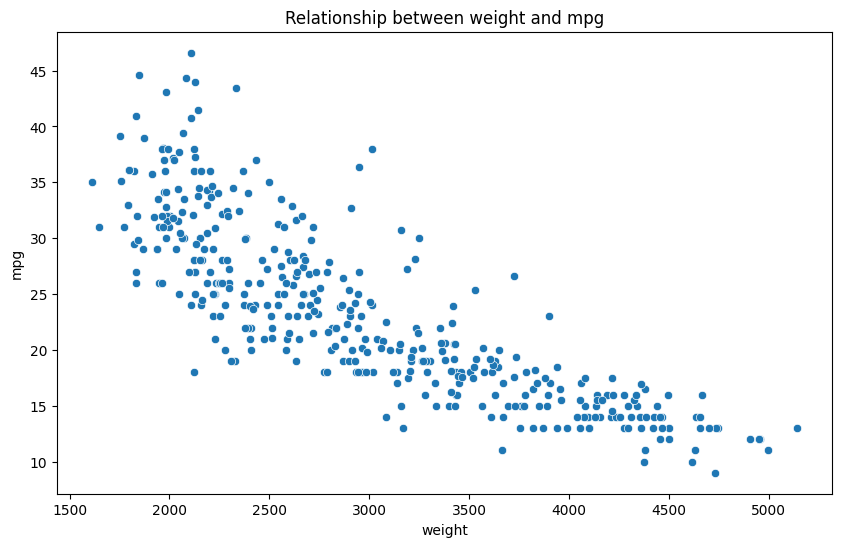

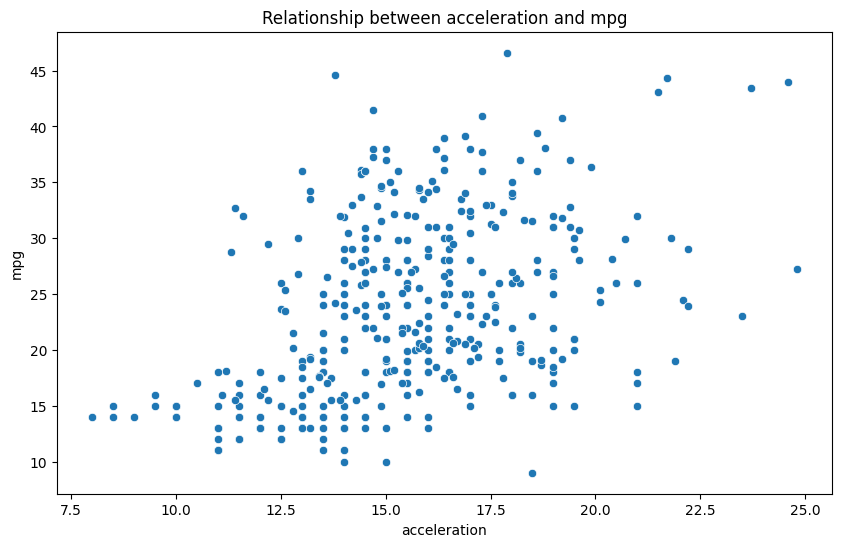

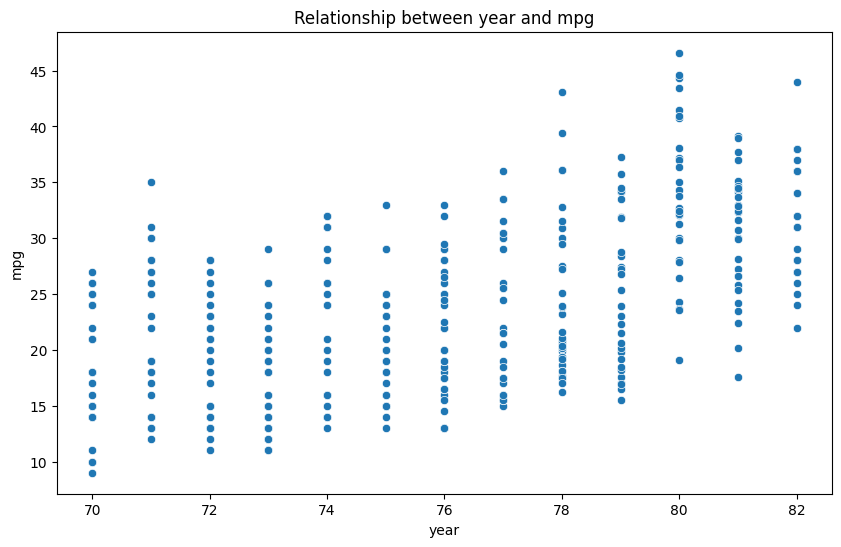

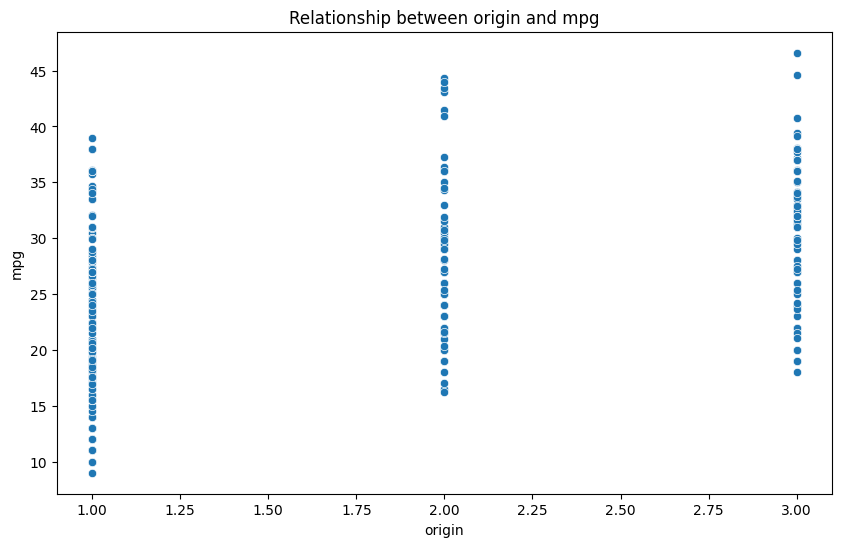

In [202]:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=feature, y='mpg')
    plt.title(f'Relationship between {feature} and mpg')
    plt.show()

Let's look at the heatmap of coefficients to better depect the linear relationship with coeffs.

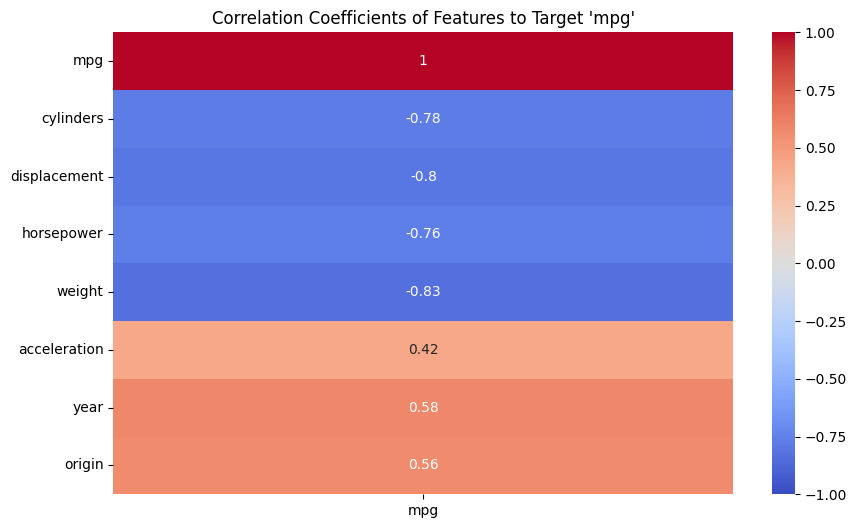

In [203]:
corr_matrix = data.corr()
mpg_corr = corr_matrix[["mpg"]]
plt.figure(figsize=(10, 6))
sns.heatmap(mpg_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Coefficients of Features to Target 'mpg'")
plt.show()

2. Data Preparation
- For this experiment, you will conduct a simple linear regression focusing on the horsepower feature and the target,mpg. 

2. (f) If any missing values are detected in the ‘horsepower’, impute them with the feature’s mean value.
- For validation, display both original missing values alongside their imputed replacements. 

- note: as we replaced "?" with zeros last time to be able convert horsepower into numerical. we'll replace zeros with mean values for horsepower.

In [204]:
mean_horsepower = data[data['horsepower'] != 0]['horsepower'].mean()
original_and_imputed = data[data['horsepower'] == 0][['horsepower']].copy()
original_and_imputed['imputed_horsepower'] = mean_horsepower
data.loc[data['horsepower'] == 0, 'horsepower'] = mean_horsepower
print(original_and_imputed)

     horsepower  imputed_horsepower
32          0.0          104.469388
126         0.0          104.469388
330         0.0          104.469388
336         0.0          104.469388
354         0.0          104.469388


2. (g) Divide the data into training and test subsets using the holdout method; allocate 30% of testing, and the remaining 70% for training

In [205]:
y = data["mpg"]
X = data.drop(columns=["mpg"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [206]:
print(len(X), len(y))

397 397


3. Linear Regression Model

3. (h) Develop a regression model utilizing the training data and assess it using the test data. 

In [207]:
model = LinearRegression()
model = model.fit(X_train, y_train)

3. (i) Show the linear regression equation in the form Y=α+βX.

In [208]:
coefficients = model.coef_ #there's more than one coefficient.
intercept = model.intercept_
print("y =", end=" ")
x = 0
for coef in coefficients:
    print("+ ("+str(round(coef,2))+")"+"x"+str(x)+" ", end= " ")
    x = x+1
print(str(round(intercept,2)))

y = + (-0.37)x0  + (0.02)x1  + (-0.01)x2  + (-0.01)x3  + (0.19)x4  + (0.81)x5  + (1.42)x6  -22.77


Therefore the equation is:

y = + (-0.49)x0  + (0.02)x1  + (0.0)x2  + (-0.01)x3  + (0.22)x4  + (0.76)x5  + (1.2)x6  -19.36

3. (j) Illustrate the regression line and data points via a scatter plot. If the intercept is not vividly represented, annotate the intercept value on the plot.

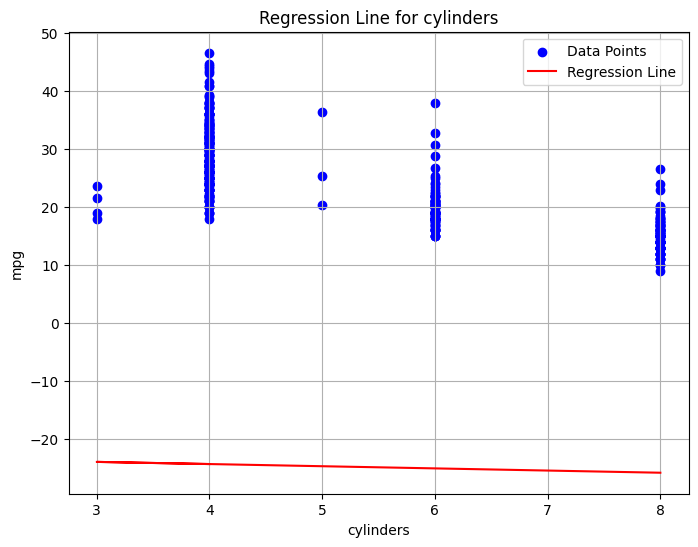

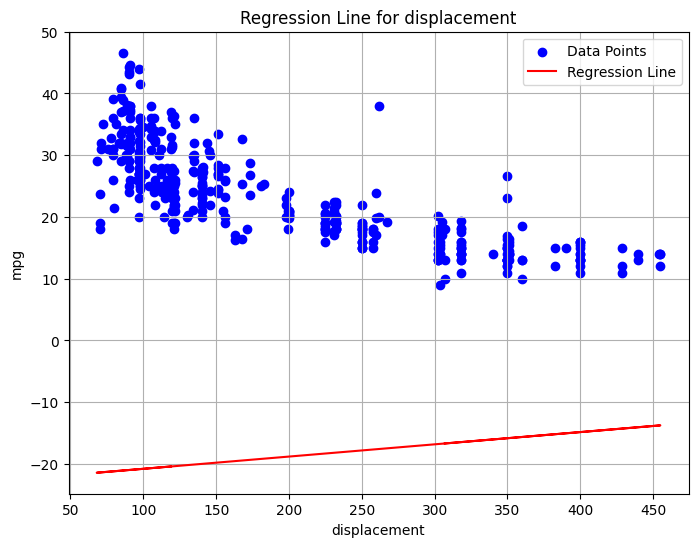

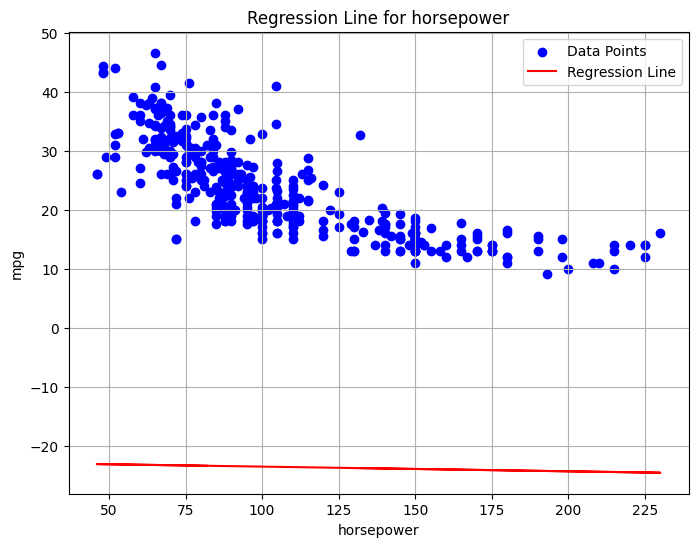

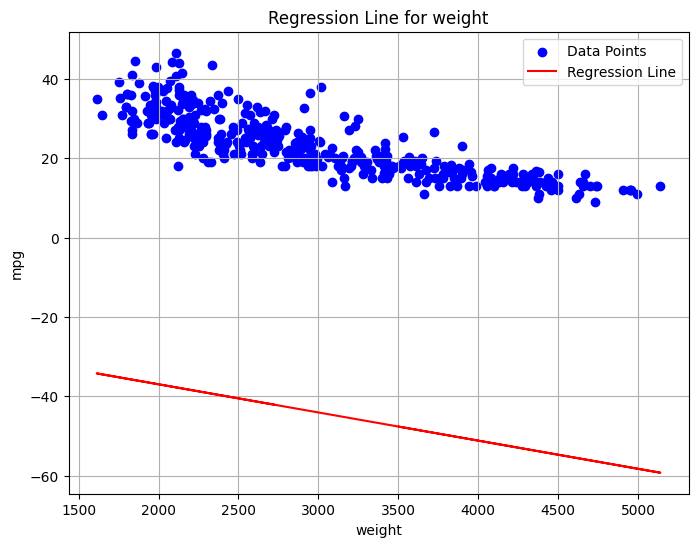

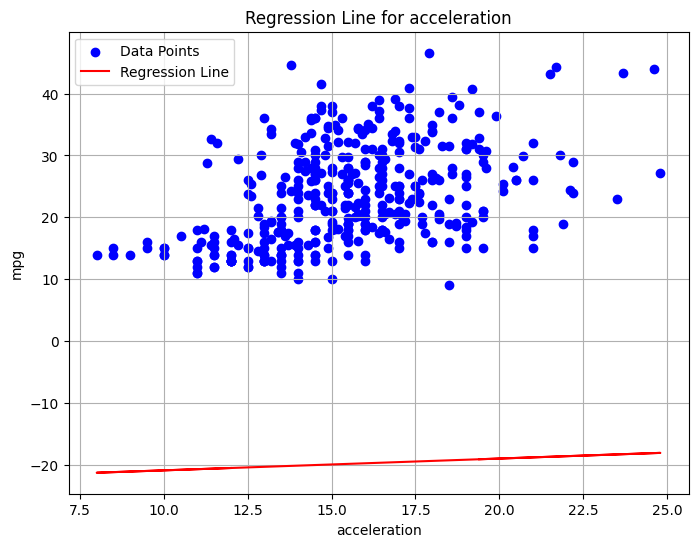

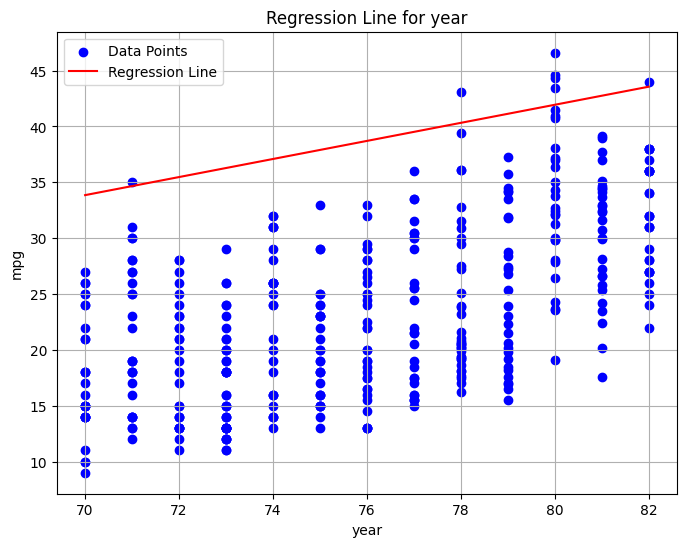

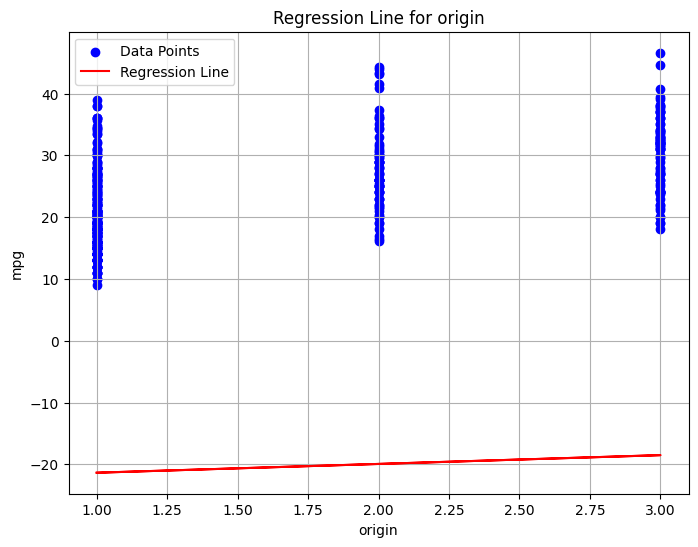

In [209]:
features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']

for index, feature in enumerate(features):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[feature], y, color='blue', label='Data Points')
    y_pred = model.intercept_ + model.coef_[index] * X[feature]
    plt.plot(X[feature], y_pred, color='red', label='Regression Line')
    if 0 < max(X[feature]) and 0 < min(X[feature]):
        plt.annotate(f'Intercept: {model.intercept_:.2f}', xy=(0, model.intercept_), 
                     xytext=(min(X[feature]), model.intercept_ + 5),
                     arrowprops=dict(facecolor='black', arrowstyle="->"))
    
    plt.title(f'Regression Line for {feature}')
    plt.xlabel(feature)
    plt.ylabel('mpg')  
    plt.legend()
    plt.grid(True)
    plt.show()
plt.show()


3. Model Evaluation

3. (k) Present a prediction-true plot (y-y plot) where the x-axis represent the true target value and the yaxis denoted the predicted target value. 

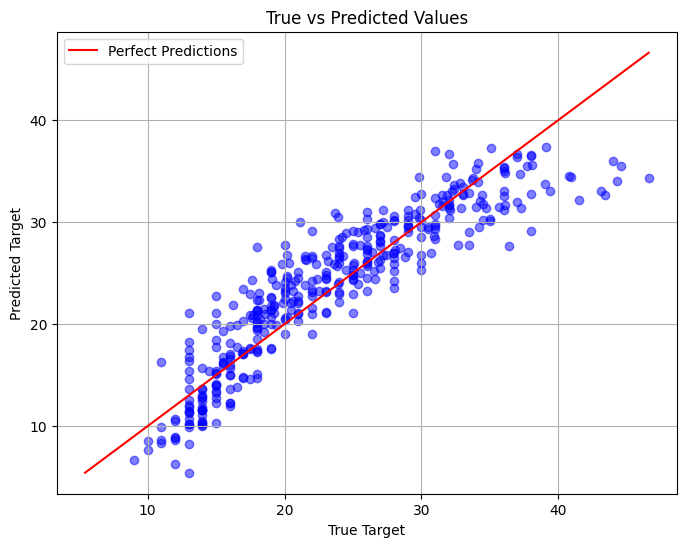

In [210]:
y_pred = model.predict(X)

plt.figure(figsize=(8, 6))

plt.scatter(y, y_pred, color='blue', alpha=0.5)

min_val = min(min(y), min(y_pred))
max_val = max(max(y), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', label='Perfect Predictions')


plt.xlabel('True Target')
plt.ylabel('Predicted Target')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

3. (l) Evaluate the model using performance metrics: 
- Mean Absolute Error (MAE)
- Mean Squared Error(MSE)
- Root Mean Squared Error (RMSE)
- and Coefficient of Determination R2 

In [211]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("The Mean absolute error is: "+str(mae))
print("The Mean Squared error is: "+str(mse))
print("The Root Mean Squared Error is: "+str(rmse))
print("The R2 score is: "+str(r2))

The Mean absolute error is: 2.735956270514946
The Mean Squared error is: 12.604189203548035
The Root Mean Squared Error is: 12.604189203548035
The R2 score is: 0.7589004950632849


3. (m) Lastly, exhibit a 3D surface plot depicting the error space, with the x-axis representing the coefficient of ‘Horsepower’, the y-axis representing the intercept, and the z-axis indicating the mean square error.

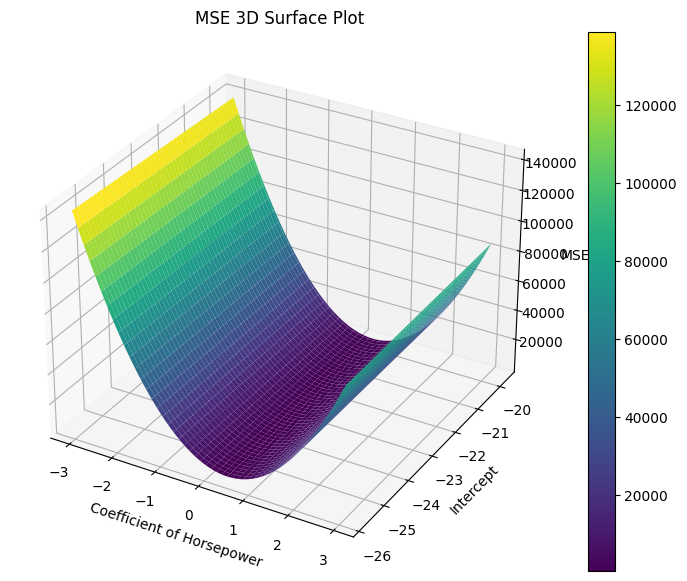

In [212]:
import numpy as np

horsepower_coeff_values = np.linspace(model.coef_[2] - 3, model.coef_[2] + 3, 100)  
intercept_values = np.linspace(model.intercept_ - 3, model.intercept_ + 3, 100) 
mse_values = np.zeros((len(horsepower_coeff_values), len(intercept_values)))

for i, coeff in enumerate(horsepower_coeff_values):
    for j, intercept in enumerate(intercept_values):
        y_pred_temp = coeff * X_test.iloc[:, 2] + intercept 
        mse_values[i, j] = mean_squared_error(y_test, y_pred_temp)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(horsepower_coeff_values, intercept_values)
Z = mse_values.T

surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_xlabel('Coefficient of Horsepower')
ax.set_ylabel('Intercept')
ax.set_zlabel('MSE')
ax.set_title('MSE 3D Surface Plot')
fig.colorbar(surf)
plt.show()
